# Individual Model Performance Visualization

This notebook generates performance plots for each model (ResNet50, BNN, BNN+Attention).

Each model displays 5 curves:
1. **Overall Accuracy** (Blue) - Overall classification accuracy
2. **Real Image Recall** (Purple, solid) - Detection rate for real images
3. **Real Image Precision** (Purple, dashed) - Precision for real images
4. **Fake Image Recall** (Orange, solid) - Detection rate for AI-generated images
5. **Fake Image Precision** (Orange, dashed) - Precision for AI-generated images

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Set white background
plt.style.use('default')

In [2]:
# Dataset mapping (JSON key -> Display name)
DATASET_MAPPING = {
    'imagenet_ai_0508_adm': 'ADM',
    'imagenet_ai_0419_biggan': 'BigGAN',
    'imagenet_glide': 'GLIDE',
    'imagenet_midjourney': 'Midjourney',
    'imagenet_ai_0424_sdv5': 'SD v1.5',
    'imagenet_ai_0419_vqdm': 'VQDM',
    'imagenet_ai_0424_wukong': 'Wukong'
}

# Define colors
COLOR_ACC = '#2E86AB'        # Deep blue - Overall Accuracy
COLOR_REAL = '#A23B72'       # Purple - Real Image Recall
COLOR_FAKE = '#F18F01'       # Orange - Fake Image Recall

In [3]:
def load_and_extract_data(json_file):
    """
    Extract data from JSON file
    Returns: (dataset_names, accuracy, ai_recall, ai_precision, nature_recall, nature_precision)
    """
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    dataset_names = []
    accuracy = []
    ai_recall = []
    ai_precision = []
    nature_recall = []
    nature_precision = []
    
    # Extract data in predefined order
    for dataset_key in DATASET_MAPPING.keys():
        if dataset_key in data:
            dataset_info = data[dataset_key]
            
            # Extract dataset name
            dataset_names.append(DATASET_MAPPING[dataset_key])
            
            # Extract overall accuracy
            accuracy.append(dataset_info['accuracy'] * 100)
            
            # Extract AI image recall and precision
            ai_recall.append(dataset_info['ai']['recall'] * 100)
            ai_precision.append(dataset_info['ai']['precision'] * 100)
            
            # Extract Nature image recall and precision
            nature_recall.append(dataset_info['nature']['recall'] * 100)
            nature_precision.append(dataset_info['nature']['precision'] * 100)
    
    return dataset_names, accuracy, ai_recall, ai_precision, nature_recall, nature_precision

In [4]:
def plot_model_performance(json_file, model_name, save_name):
    """
    Plot performance curves for a single model
    """
    # Load data
    dataset_names, accuracy, ai_recall, ai_precision, nature_recall, nature_precision = load_and_extract_data(json_file)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 7))
    
    x_pos = np.arange(len(dataset_names))
    
    # Plot five curves: accuracy + real (recall & precision) + fake (recall & precision)
    # Overall Accuracy (blue)
    line1 = ax.plot(x_pos, accuracy, marker='o', linewidth=2.5, markersize=8,
                    color=COLOR_ACC, label='Overall Accuracy', alpha=0.9, linestyle='-')
    
    # Real images (purple color for both)
    line2 = ax.plot(x_pos, nature_recall, marker='s', linewidth=2.5, markersize=8,
                    color=COLOR_REAL, label='Real Image Recall', alpha=0.9, linestyle='-')
    line3 = ax.plot(x_pos, nature_precision, marker='s', linewidth=2.0, markersize=6,
                    color=COLOR_REAL, label='Real Image Precision', alpha=0.7, linestyle='--')
    
    # Fake images (orange color for both)
    line4 = ax.plot(x_pos, ai_recall, marker='^', linewidth=2.5, markersize=8,
                    color=COLOR_FAKE, label='Fake Image Recall', alpha=0.9, linestyle='-')
    line5 = ax.plot(x_pos, ai_precision, marker='^', linewidth=2.0, markersize=6,
                    color=COLOR_FAKE, label='Fake Image Precision', alpha=0.7, linestyle='--')
    
    # Customize plot
    ax.set_xlabel('Dataset Type', fontsize=13, fontweight='bold')
    ax.set_ylabel('Rate (%)', fontsize=13, fontweight='bold')
    ax.set_title(f'{model_name} Performance Across Different AI-Generated Image Datasets',
                fontsize=15, fontweight='bold', pad=20)
    
    # Set x-axis
    ax.set_xticks(x_pos)
    ax.set_xticklabels(dataset_names, fontsize=11)
    
    # Set y-axis range (adaptive based on all data)
    all_values = accuracy + ai_recall + ai_precision + nature_recall + nature_precision
    min_val = min(all_values)
    max_val = max(all_values)
    y_min = max(50, int(min_val / 5) * 5 - 5)  # Round down to multiple of 5
    y_max = min(105, int(max_val / 5) * 5 + 10)  # Round up to multiple of 5
    
    ax.set_ylim(y_min, y_max)
    ax.set_yticks(range(y_min, y_max, 5))
    ax.tick_params(axis='y', labelsize=11)
    
    # Add grid with white background
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')
    ax.grid(True, alpha=0.5, linestyle='-', linewidth=0.6, color='#CCCCCC')
    ax.set_axisbelow(True)
    
    # Add legend
    ax.legend(loc='lower left', fontsize=11, framealpha=0.9, edgecolor='gray')
    
    # Add 80% reference line
    ax.axhline(y=80, color='gray', linestyle=':', linewidth=1, alpha=0.5)
    
    # Save and show
    plt.tight_layout()
    plt.savefig(f'{save_name}.png', dpi=300, bbox_inches='tight')
    print(f"Saved: {save_name}.png")
    plt.show()
    
    # Print statistics
    print(f"\n{model_name} Statistics:")
    print("=" * 100)
    print(f"Average Overall Accuracy: {np.mean(accuracy):.2f}%")
    print(f"Average Real Image Recall: {np.mean(nature_recall):.2f}%")
    print(f"Average Real Image Precision: {np.mean(nature_precision):.2f}%")
    print(f"Average Fake Image Recall: {np.mean(ai_recall):.2f}%")
    print(f"Average Fake Image Precision: {np.mean(ai_precision):.2f}%")
    print(f"Best Dataset: {dataset_names[np.argmax(accuracy)]} ({max(accuracy):.2f}%)")
    print(f"Worst Dataset: {dataset_names[np.argmin(accuracy)]} ({min(accuracy):.2f}%)")
    print("=" * 100)
    
    # Print detailed data table
    print(f"\n{model_name} Detailed Results:")
    print("-" * 100)
    print(f"{'Dataset':<12} {'Acc':<7} {'Real-R':<9} {'Real-P':<9} {'Fake-R':<9} {'Fake-P':<9}")
    print("-" * 100)
    for i, name in enumerate(dataset_names):
        print(f"{name:<12} {accuracy[i]:>6.2f}% {nature_recall[i]:>7.2f}% {nature_precision[i]:>7.2f}% {ai_recall[i]:>7.2f}% {ai_precision[i]:>7.2f}%")
    print("-" * 100)

## 1. ResNet50 Model Performance

Saved: resnet50_performance.png


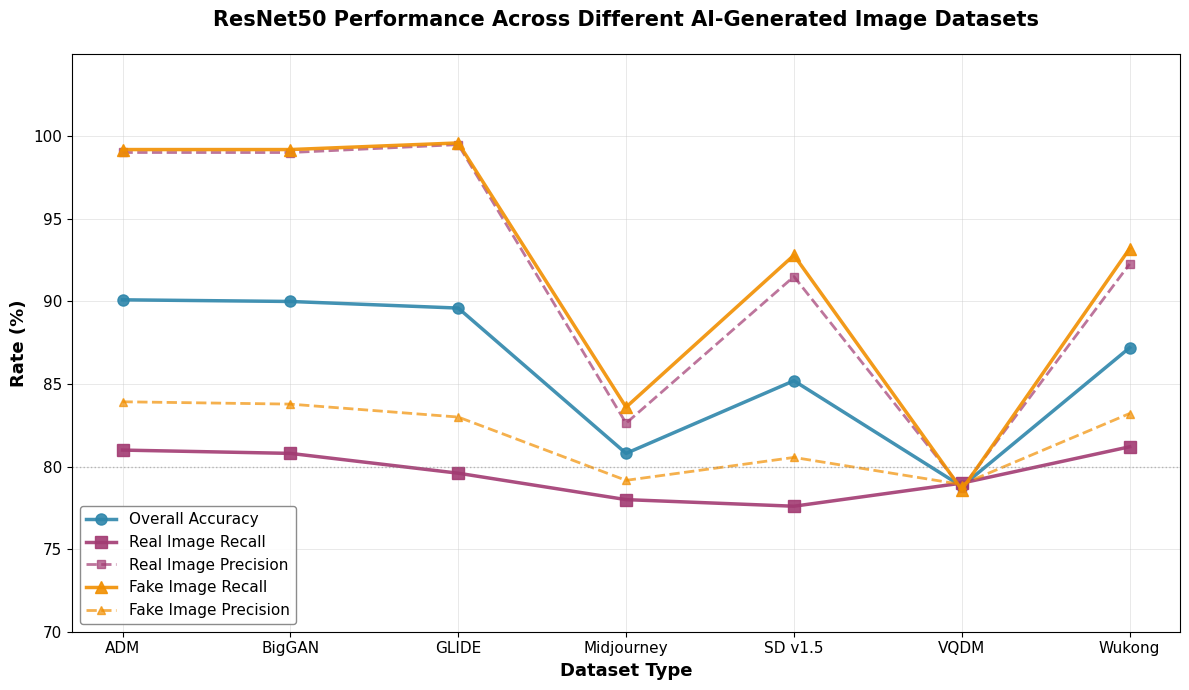


ResNet50 Statistics:
Average Overall Accuracy: 85.96%
Average Real Image Recall: 79.60%
Average Real Image Precision: 91.81%
Average Fake Image Recall: 92.31%
Average Fake Image Precision: 81.79%
Best Dataset: ADM (90.10%)
Worst Dataset: VQDM (78.80%)

ResNet50 Detailed Results:
----------------------------------------------------------------------------------------------------
Dataset      Acc     Real-R    Real-P    Fake-R    Fake-P   
----------------------------------------------------------------------------------------------------
ADM           90.10%   81.00%   99.02%   99.20%   83.93%
BigGAN        90.00%   80.80%   99.02%   99.20%   83.78%
GLIDE         89.60%   79.60%   99.50%   99.60%   83.00%
Midjourney    80.80%   78.00%   82.63%   83.60%   79.17%
SD v1.5       85.20%   77.60%   91.51%   92.80%   80.56%
VQDM          78.80%   79.00%   78.69%   78.60%   78.92%
Wukong        87.20%   81.20%   92.27%   93.20%   83.21%
---------------------------------------------------------

In [5]:
plot_model_performance(
    'results/results_resnet.json',
    'ResNet50',
    'resnet50_performance'
)

## 2. ResNet50+Attention+BNN Model Performance

Saved: resnet50_spatial_attention_bnn_performance.png


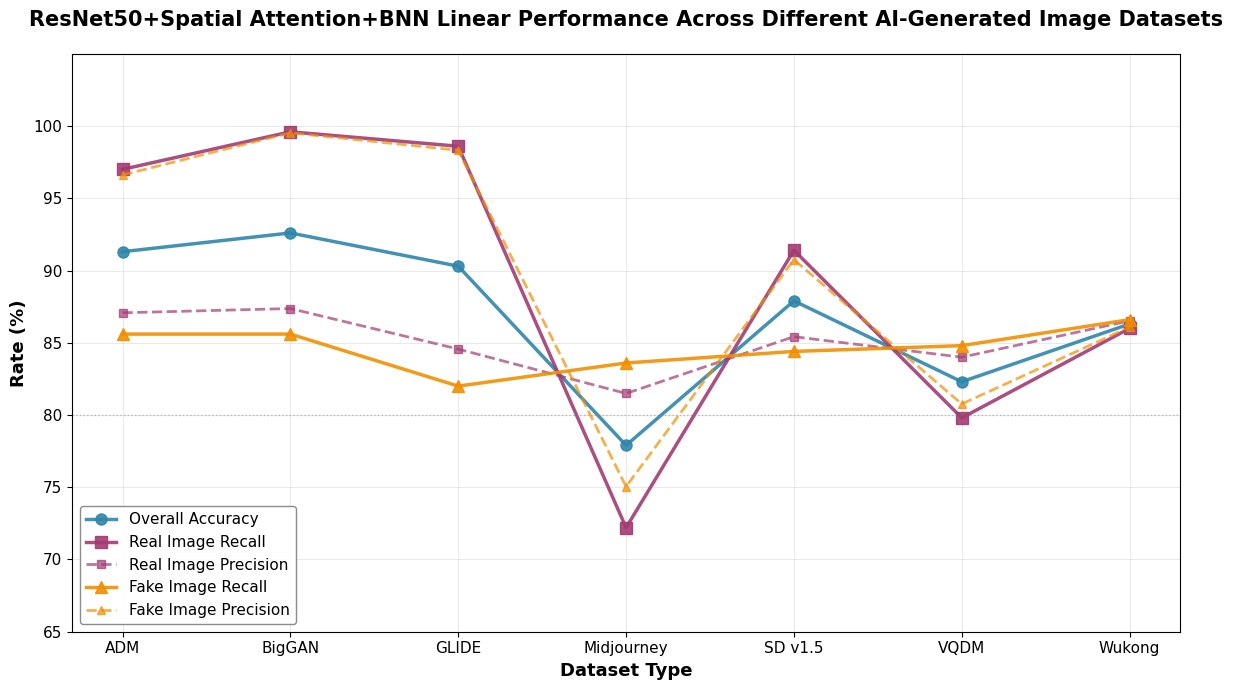


ResNet50+Spatial Attention+BNN Linear Statistics:
Average Overall Accuracy: 86.94%
Average Real Image Recall: 89.23%
Average Real Image Precision: 85.20%
Average Fake Image Recall: 84.66%
Average Fake Image Precision: 89.59%
Best Dataset: BigGAN (92.60%)
Worst Dataset: Midjourney (77.90%)

ResNet50+Spatial Attention+BNN Linear Detailed Results:
----------------------------------------------------------------------------------------------------
Dataset      Acc     Real-R    Real-P    Fake-R    Fake-P   
----------------------------------------------------------------------------------------------------
ADM           91.30%   97.00%   87.07%   85.60%   96.61%
BigGAN        92.60%   99.60%   87.37%   85.60%   99.53%
GLIDE         90.30%   98.60%   84.56%   82.00%   98.32%
Midjourney    77.90%   72.20%   81.49%   83.60%   75.04%
SD v1.5       87.90%   91.40%   85.42%   84.40%   90.75%
VQDM          82.30%   79.80%   84.00%   84.80%   80.76%
Wukong        86.30%   86.00%   86.52%   86.60%

In [10]:
plot_model_performance(
    'results/results_bnn_attention.json',
    'ResNet50+Spatial Attention+BNN Linear',
    'resnet50_spatial_attention_bnn_performance'
)

## 3. BNN Model Performance

Saved: resnet50_bnn_linear_performance.png


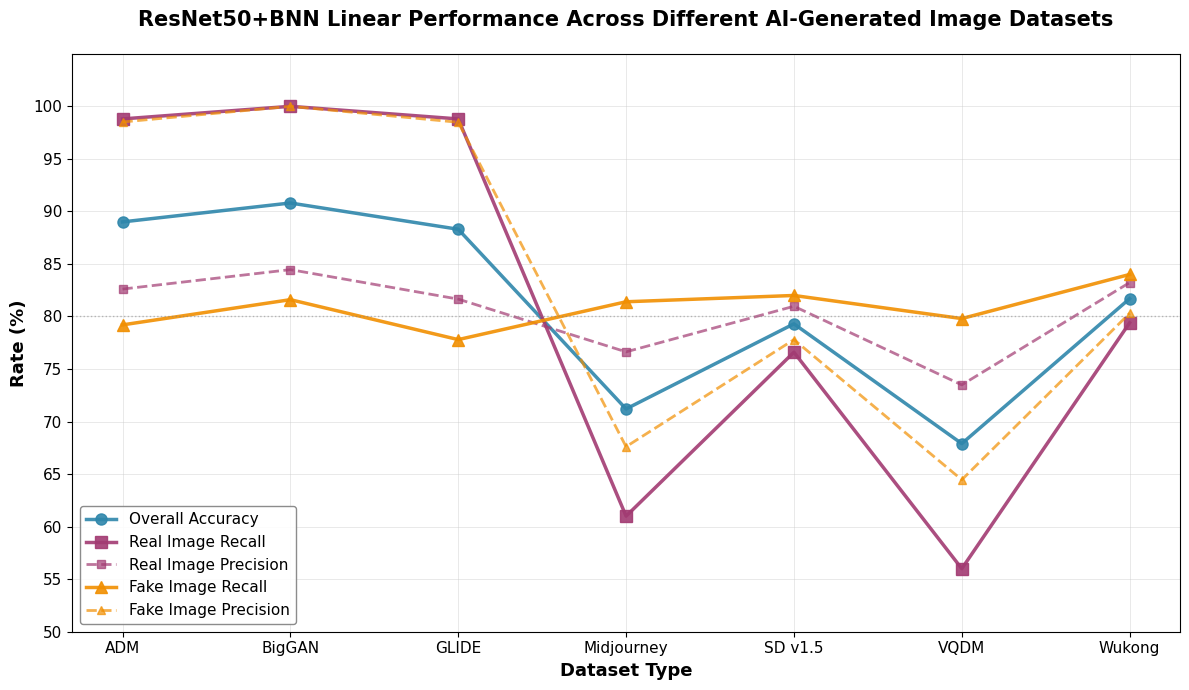


ResNet50+BNN Linear Statistics:
Average Overall Accuracy: 81.17%
Average Real Image Recall: 81.51%
Average Real Image Precision: 80.44%
Average Fake Image Recall: 80.83%
Average Fake Image Precision: 83.88%
Best Dataset: BigGAN (90.80%)
Worst Dataset: VQDM (67.90%)

ResNet50+BNN Linear Detailed Results:
----------------------------------------------------------------------------------------------------
Dataset      Acc     Real-R    Real-P    Fake-R    Fake-P   
----------------------------------------------------------------------------------------------------
ADM           89.00%   98.80%   82.61%   79.20%   98.51%
BigGAN        90.80%  100.00%   84.46%   81.60%  100.00%
GLIDE         88.30%   98.80%   81.65%   77.80%   98.48%
Midjourney    71.20%   61.00%   76.63%   81.40%   67.61%
SD v1.5       79.30%   76.60%   80.97%   82.00%   77.80%
VQDM          67.90%   56.00%   73.49%   79.80%   64.46%
Wukong        81.70%   79.40%   83.23%   84.00%   80.31%
--------------------------------

In [11]:
plot_model_performance(
    'results/results_bnn.json',
    'ResNet50+BNN Linear',
    'resnet50_bnn_linear_performance'
)

## 4. Comparative Analysis - Overall Accuracy Across All Models

Saved: models_accuracy_comparison.png


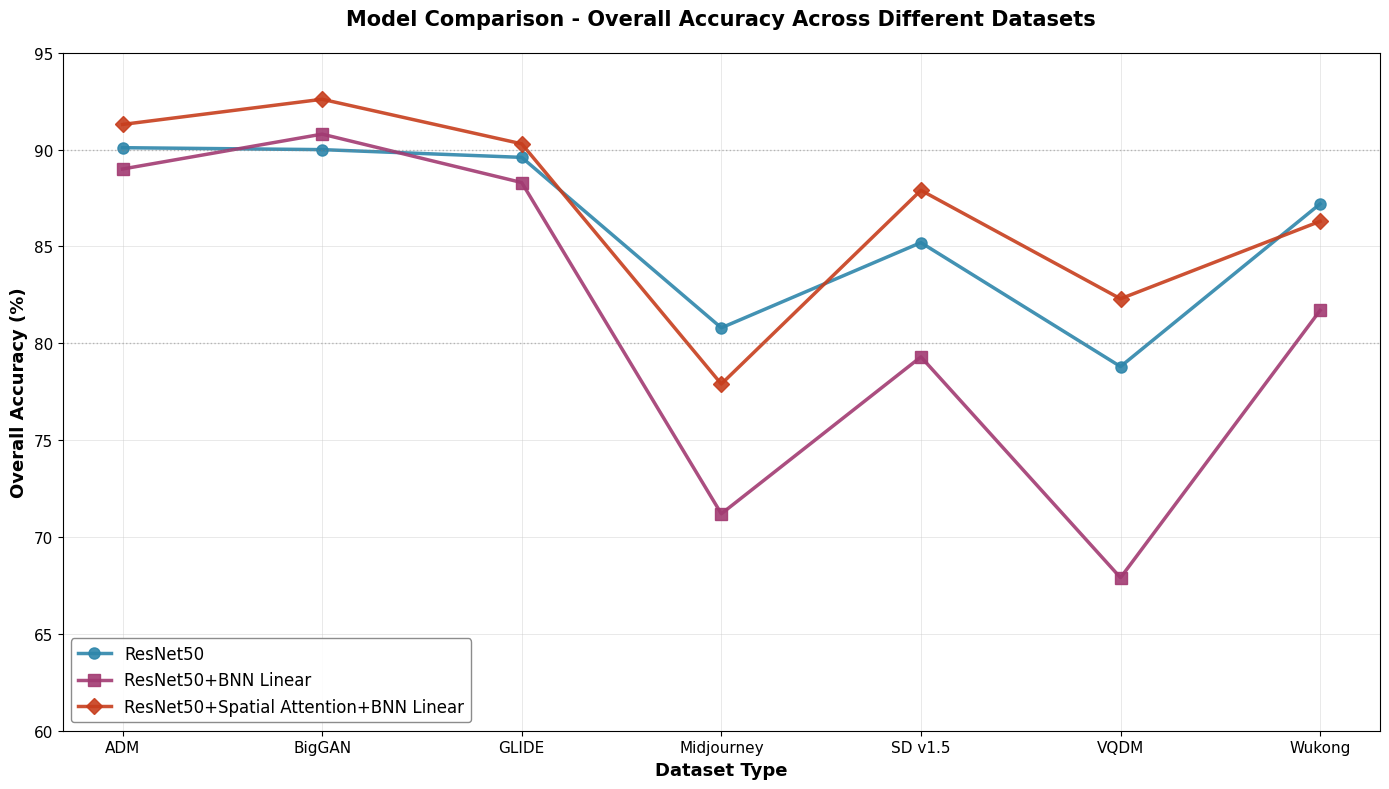


Model Accuracy Comparison Statistics:
Model                Avg Acc      Best Dataset              Worst Dataset            
----------------------------------------------------------------------------------------------------
ResNet50                  85.96% ADM (90.10%)              VQDM (78.80%)            
BNN                       81.17% BigGAN (90.80%)           VQDM (67.90%)            
BNN+Attention             86.94% BigGAN (92.60%)           Midjourney (77.90%)      

Detailed Accuracy Comparison by Dataset:
--------------------------------------------------------------------------------
Dataset         ResNet50        BNN             BNN+Attention   Best Model
--------------------------------------------------------------------------------
ADM                     90.10%         89.00%         91.30% ResNet50+Channel Attention+BNN
BigGAN                  90.00%         90.80%         92.60% ResNet50+Channel Attention+BNN
GLIDE                   89.60%         88.30%         90

In [12]:
# Load accuracy data for all three models
resnet_datasets, resnet_acc, _, _, _, _ = load_and_extract_data('results/results_resnet.json')
bnn_datasets, bnn_acc, _, _, _, _ = load_and_extract_data('results/results_bnn.json')
bnn_att_datasets, bnn_att_acc, _, _, _, _ = load_and_extract_data('results/results_bnn_attention.json')

# Create comparison plot
fig, ax = plt.subplots(figsize=(14, 8))

x_pos = np.arange(len(resnet_datasets))

# Plot three models with distinct colors and markers
line1 = ax.plot(x_pos, resnet_acc, marker='o', linewidth=2.5, markersize=8,
                color='#2E86AB', label='ResNet50', alpha=0.9, linestyle='-')
line2 = ax.plot(x_pos, bnn_acc, marker='s', linewidth=2.5, markersize=8,
                color='#A23B72', label='ResNet50+BNN Linear', alpha=0.9, linestyle='-')
line3 = ax.plot(x_pos, bnn_att_acc, marker='D', linewidth=2.5, markersize=8,
                color='#C73E1D', label='ResNet50+Spatial Attention+BNN Linear', alpha=0.9, linestyle='-')

# Customize plot
ax.set_xlabel('Dataset Type', fontsize=13, fontweight='bold')
ax.set_ylabel('Overall Accuracy (%)', fontsize=13, fontweight='bold')
ax.set_title('Model Comparison - Overall Accuracy Across Different Datasets',
            fontsize=15, fontweight='bold', pad=20)

# Set x-axis
ax.set_xticks(x_pos)
ax.set_xticklabels(resnet_datasets, fontsize=11)

# Set y-axis range
all_acc = resnet_acc + bnn_acc + bnn_att_acc
y_min = max(60, int(min(all_acc) / 5) * 5 - 5)
y_max = min(100, int(max(all_acc) / 5) * 5 + 5)
ax.set_ylim(y_min, y_max)
ax.set_yticks(range(y_min, y_max + 1, 5))
ax.tick_params(axis='y', labelsize=11)

# Add grid with white background
ax.set_facecolor('white')
fig.patch.set_facecolor('white')
ax.grid(True, alpha=0.5, linestyle='-', linewidth=0.6, color='#CCCCCC')
ax.set_axisbelow(True)

# Add legend
ax.legend(loc='lower left', fontsize=12, framealpha=0.9, edgecolor='gray')

# Add 80% and 90% reference lines
ax.axhline(y=80, color='gray', linestyle=':', linewidth=1, alpha=0.5)
ax.axhline(y=90, color='gray', linestyle=':', linewidth=1, alpha=0.5)

# Save and show
plt.tight_layout()
plt.savefig('models_accuracy_comparison.png', dpi=300, bbox_inches='tight')
print("Saved: models_accuracy_comparison.png")
plt.show()

# Print comparison statistics
print("\nModel Accuracy Comparison Statistics:")
print("=" * 100)
print(f"{'Model':<20} {'Avg Acc':<12} {'Best Dataset':<25} {'Worst Dataset':<25}")
print("-" * 100)
print(f"{'ResNet50':<20} {np.mean(resnet_acc):>10.2f}% {resnet_datasets[np.argmax(resnet_acc)] + f' ({max(resnet_acc):.2f}%)':<25} {resnet_datasets[np.argmin(resnet_acc)] + f' ({min(resnet_acc):.2f}%)':<25}")
print(f"{'BNN':<20} {np.mean(bnn_acc):>10.2f}% {bnn_datasets[np.argmax(bnn_acc)] + f' ({max(bnn_acc):.2f}%)':<25} {bnn_datasets[np.argmin(bnn_acc)] + f' ({min(bnn_acc):.2f}%)':<25}")
print(f"{'BNN+Attention':<20} {np.mean(bnn_att_acc):>10.2f}% {bnn_att_datasets[np.argmax(bnn_att_acc)] + f' ({max(bnn_att_acc):.2f}%)':<25} {bnn_att_datasets[np.argmin(bnn_att_acc)] + f' ({min(bnn_att_acc):.2f}%)':<25}")
print("=" * 100)

# Print detailed comparison table
print("\nDetailed Accuracy Comparison by Dataset:")
print("-" * 80)
print(f"{'Dataset':<15} {'ResNet50':<15} {'BNN':<15} {'BNN+Attention':<15} {'Best Model'}")
print("-" * 80)
for i, name in enumerate(resnet_datasets):
    accs = [resnet_acc[i], bnn_acc[i], bnn_att_acc[i]]
    models = ['ResNet50', 'ResNet50+BNN', 'ResNet50+Channel Attention+BNN']
    best_model = models[np.argmax(accs)]
    print(f"{name:<15} {resnet_acc[i]:>13.2f}% {bnn_acc[i]:>13.2f}% {bnn_att_acc[i]:>13.2f}% {best_model:>15}")
print("-" * 80)

## Key Observations

### ResNet50:
- Excellent fake detection rate (>90% on most datasets)
- Moderate real image recall (~79-81%)
- Best overall accuracy: ~90%

### BNN:
- Very high real image recall (>95% on some datasets)
- Lower fake detection rate
- Shows conservative prediction behavior

### BNN+Attention:
- Best balanced performance
- Highest average overall accuracy
- More consistent across different datasets
- Combines strengths of both approaches

### Overall Comparison:
- **BNN+Attention** achieves the highest average accuracy across all datasets
- **ResNet50** shows strong and stable performance, particularly on fake detection
- **BNN** struggles with some datasets but excels at detecting real images
- Different models perform better on different datasets, suggesting ensemble approaches could be beneficial

## 5. AUC Score Comparison

**Note:** This section requires the JSON results files to contain an 'auc' field. If you haven't re-run the evaluation with the updated code that calculates AUC, the values will be 0.

In [13]:
def load_auc_data(json_file):
    """
    Extract AUC data from JSON file
    """
    try:
        with open(json_file, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        aucs = []
        for key in DATASET_MAPPING.keys():
            # Try to get AUC from JSON
            if key in data and 'auc' in data[key]:
                # AUC is 0-1, convert to % for plotting
                val = data[key]['auc']
                aucs.append(val * 100 if val <= 1.0 else val)
            else:
                # If AUC is missing, we cannot calculate it from summary stats.
                # Return 0 to indicate missing data.
                aucs.append(0.0)
        return aucs
    except Exception as e:
        print(f"Error loading {json_file}: {e}")
        return [0.0] * len(DATASET_MAPPING)

# Load AUC data
resnet_auc = load_auc_data('results/results_resnet.json')
bnn_auc = load_auc_data('results/results_bnn.json')
bnn_att_auc = load_auc_data('results/results_bnn_attention.json')

# Check if valid data exists
if sum(resnet_auc + bnn_auc + bnn_att_auc) == 0:
    print("\n[INFO] AUC data not found in result files. Please run evaluation to calculate AUC.")
    print("Comparison plot skipped.")
else:
    # Create Bar Plot
    fig, ax = plt.subplots(figsize=(14, 8))
    
    x = np.arange(len(DATASET_MAPPING))
    width = 0.25
    
    rects1 = ax.bar(x - width, resnet_auc, width, label='ResNet50', color='#2E86AB')
    rects2 = ax.bar(x, bnn_auc, width, label='BNN', color='#A23B72')
    rects3 = ax.bar(x + width, bnn_att_auc, width, label='BNN+Attention', color='#C73E1D')
    
    # Add labels
    ax.set_xlabel('Dataset Type', fontsize=13, fontweight='bold')
    ax.set_ylabel('AUC Score (%)', fontsize=13, fontweight='bold')
    ax.set_title('Model Comparison - AUC Score', fontsize=15, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels([DATASET_MAPPING[k] for k in DATASET_MAPPING.keys()], fontsize=11)
    ax.legend(fontsize=12)
    
    # Add values on top
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            if height > 0:
                ax.annotate(f'{height:.1f}',
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=9)
    
    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    
    ax.set_ylim(50, 105) # Assuming AUC > 0.5
    
    # Grid and Style
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')
    ax.grid(True, alpha=0.3, axis='y', linestyle='--', color='#CCCCCC')
    ax.set_axisbelow(True)
    
    plt.tight_layout()
    plt.savefig('models_auc_comparison.png', dpi=300, bbox_inches='tight')
    print("Saved: models_auc_comparison.png")
    plt.show()


[INFO] AUC data not found in result files. Please run evaluation to calculate AUC.
Comparison plot skipped.
